In [202]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [203]:
main_path="C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\"
open_folder = os.listdir(main_path)
Data_base_learning = main_path+open_folder[2]
Data_base_learning_v2 = main_path+open_folder[3]
Points_equipe = main_path+open_folder[3]
Teams_puissance = main_path+open_folder[5]

In [204]:
train_csv = pd.read_csv(Data_base_learning_v2,sep=";",encoding="utf-8")
display(train_csv)

,Unnamed: 0,date,idHomeTeam,idAwayTeam,homeTeam,awayTeam,score,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,goalHomeTeam_FullTime,goalAwayTeam_FullTime,win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam
0,0,2019-08-09,548,523,AS Monaco FC,Olympique Lyonnais,2.0,0,2,0,3,-1,-1,-1,-1,2409,6154
1,1,2019-08-10,516,547,Olympique de Marseille,Stade de Reims,2.0,0,0,0,2,-1,-1,-1,-1,4008,3054
2,2,2019-08-10,518,529,Montpellier HSC,Stade Rennais FC 1901,2.0,0,1,0,1,-1,-1,-1,-1,3029,100
3,3,2019-08-10,522,530,OGC Nice,Amiens SC,1.0,1,0,2,1,-1,-1,-1,-1,2803,2045
4,4,2019-08-10,512,511,Stade Brestois 29,Toulouse FC,0.0,1,0,1,1,-1,-1,-1,-1,2156,1065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,1714,2020-02-26,523,109,Olympique Lyonnais,Juventus FC,1.0,1,0,1,0,1,2,0,0,6154,9319
1287,1715,2020-03-10,95,102,Valencia CF,Atalanta BC,2.0,1,2,3,4,0,4,0,0,9770,7928
1288,1716,2020-03-10,721,73,RB Leipzig,Tottenham Hotspur FC,1.0,2,0,3,0,1,0,0,0,9221,6821
1289,1717,2020-03-11,524,4,Paris Saint-Germain FC,BV Borussia 09 Dortmund,1.0,2,0,2,0,2,2,0,0,9495,7276


In [205]:
df = train_csv['goalAwayTeam_FullTime']
df.unique()

array([3, 2, 1, 0, 4, 5, 9, 6, 7], dtype=int64)

In [206]:
X = train_csv.drop(['idHomeTeam','idAwayTeam','score','homeTeam','awayTeam','date','goalHomeTeam_HalfTime','goalAwayTeam_HalfTime','goalHomeTeam_FullTime','goalAwayTeam_FullTime'],axis=1).values
X = X[:,1:]
Y = train_csv['score'].values
X[0]

array([  -1,   -1,   -1,   -1, 2409, 6154], dtype=int64)

In [207]:
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.2)
print(x_train.shape,y_train.shape)

(1032, 6) (1032,)


In [208]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [209]:
# for row in y_train:
#      print(row)

In [210]:
x_train

array([[    0,     0,     0,     1,  7151,  4146],
       [    0,     1,     2,     0,  3890,  5188],
       [    1,     1,     0,     0,  7938, 10390],
       ...,
       [   -1,    -1,    -1,    -1,   195,   135],
       [    1,     3,     0,     0,  7311, 10390],
       [    0,     0,     1,     1,   100,  1140]], dtype=int64)

In [211]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [212]:
model = create_model()
print(model.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_139 (Dense)            (None, 512)               3584      
_________________________________________________________________
dense_140 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_141 (Dense)            (None, 3)                 387       
Total params: 69,635
Trainable params: 69,635
Non-trainable params: 0
_________________________________________________________________
None


In [225]:
history = model.fit(x_train, y_train,validation_data=(x_test, y_test),batch_size=60,epochs=200)

Train on 1032 samples, validate on 259 samples
Epoch 1/200
1032/1032 [==============================] - 0s 66us/sample - loss: 4.1249 - accuracy: 0.4486 - val_loss: 4.7579 - val_accuracy: 0.4556
Epoch 2/200
1032/1032 [==============================] - 0s 57us/sample - loss: 3.0035 - accuracy: 0.4390 - val_loss: 4.8271 - val_accuracy: 0.4054
Epoch 3/200
1032/1032 [==============================] - 0s 61us/sample - loss: 3.1073 - accuracy: 0.4060 - val_loss: 6.3617 - val_accuracy: 0.4595
Epoch 4/200
1032/1032 [==============================] - 0s 64us/sample - loss: 3.6935 - accuracy: 0.4293 - val_loss: 4.5381 - val_accuracy: 0.4363
Epoch 5/200
1032/1032 [==============================] - 0s 62us/sample - loss: 4.3471 - accuracy: 0.4254 - val_loss: 3.0821 - val_accuracy: 0.4479
Epoch 6/200
1032/1032 [==============================] - 0s 62us/sample - loss: 3.1254 - accuracy: 0.4399 - val_loss: 5.5237 - val_accuracy: 0.3475
Epoch 7/200
1032/1032 [==============================] - 0s 57us/

1032/1032 [==============================] - 0s 57us/sample - loss: 1.7236 - accuracy: 0.4593 - val_loss: 2.4144 - val_accuracy: 0.4054
Epoch 56/200
1032/1032 [==============================] - 0s 58us/sample - loss: 2.1607 - accuracy: 0.4176 - val_loss: 3.2065 - val_accuracy: 0.4788
Epoch 57/200
1032/1032 [==============================] - 0s 58us/sample - loss: 1.9262 - accuracy: 0.4632 - val_loss: 1.5577 - val_accuracy: 0.3900
Epoch 58/200
1032/1032 [==============================] - 0s 55us/sample - loss: 2.1189 - accuracy: 0.4147 - val_loss: 2.5804 - val_accuracy: 0.4324
Epoch 59/200
1032/1032 [==============================] - 0s 97us/sample - loss: 1.3820 - accuracy: 0.4583 - val_loss: 2.7940 - val_accuracy: 0.4672
Epoch 60/200
1032/1032 [==============================] - 0s 60us/sample - loss: 1.9149 - accuracy: 0.4205 - val_loss: 3.0081 - val_accuracy: 0.2703
Epoch 61/200
1032/1032 [==============================] - 0s 59us/sample - loss: 1.8986 - accuracy: 0.4419 - val_loss: 

Epoch 110/200
1032/1032 [==============================] - 0s 67us/sample - loss: 2.0746 - accuracy: 0.4244 - val_loss: 2.0769 - val_accuracy: 0.4170
Epoch 111/200
1032/1032 [==============================] - 0s 68us/sample - loss: 1.5197 - accuracy: 0.4419 - val_loss: 1.5275 - val_accuracy: 0.3243
Epoch 112/200
1032/1032 [==============================] - 0s 71us/sample - loss: 1.4996 - accuracy: 0.4545 - val_loss: 1.2858 - val_accuracy: 0.4749
Epoch 113/200
1032/1032 [==============================] - 0s 65us/sample - loss: 1.4114 - accuracy: 0.4767 - val_loss: 1.5347 - val_accuracy: 0.3668
Epoch 114/200
1032/1032 [==============================] - 0s 65us/sample - loss: 1.3239 - accuracy: 0.4409 - val_loss: 1.7382 - val_accuracy: 0.3707
Epoch 115/200
1032/1032 [==============================] - 0s 64us/sample - loss: 1.4085 - accuracy: 0.4525 - val_loss: 1.6677 - val_accuracy: 0.4131
Epoch 116/200
1032/1032 [==============================] - 0s 65us/sample - loss: 1.4221 - accuracy:

1032/1032 [==============================] - 0s 65us/sample - loss: 1.2695 - accuracy: 0.4632 - val_loss: 1.3021 - val_accuracy: 0.4595
Epoch 165/200
1032/1032 [==============================] - 0s 68us/sample - loss: 1.1983 - accuracy: 0.4826 - val_loss: 1.4697 - val_accuracy: 0.4633
Epoch 166/200
1032/1032 [==============================] - 0s 76us/sample - loss: 1.3394 - accuracy: 0.4438 - val_loss: 1.4307 - val_accuracy: 0.4440
Epoch 167/200
1032/1032 [==============================] - 0s 68us/sample - loss: 1.1602 - accuracy: 0.4864 - val_loss: 1.7878 - val_accuracy: 0.3900
Epoch 168/200
1032/1032 [==============================] - 0s 64us/sample - loss: 1.2577 - accuracy: 0.4525 - val_loss: 1.1593 - val_accuracy: 0.4710
Epoch 169/200
1032/1032 [==============================] - 0s 99us/sample - loss: 1.1002 - accuracy: 0.4942 - val_loss: 1.6620 - val_accuracy: 0.4479
Epoch 170/200
1032/1032 [==============================] - 0s 91us/sample - loss: 1.2865 - accuracy: 0.4603 - val_

Text(0, 0.5, 'Accuracy')

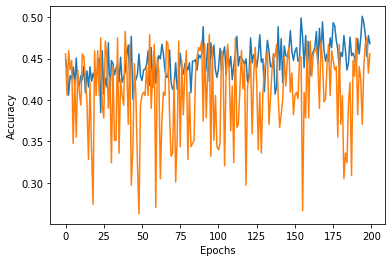

In [226]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [227]:
predictions = model.predict((x_test, y_test))

In [228]:
print(x_test[98])
print(y_test[98])
plt.show()
preds = model.predict((x_test, y_test))
print(preds[98])
np.argmax(predictions[98])

[   0    1    0    0 6846 7928]
0
[0.04936951 0.73864836 0.2119821 ]


1

# Prédiction Unique

In [229]:
unique = train_csv.values
results = []
equal = []
victory = []
loss = []
i = 0

In [230]:
for i in unique:
    puissance_homeTeam = i[15]
    puissance_awayTeam = i[16]
    win_cons_home = i[11]
    win_cons_away = i[12]
    lose_cons_home = i[13]
    lose_cons_away= i[14]
    predictions1 = model.predict(np.array([[win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam]])) # predictions avec puissance de teams au hasard
    egalite = predictions1[0][0]*100
    victoire = predictions1[0][1]*100
    perte = predictions1[0][2]*100
    result = np.argmax(predictions1)
    results.append(result)
    equal.append(egalite)
    victory.append(victoire)
    loss.append(perte)
    print(result,egalite,victoire , perte ,puissance_homeTeam,puissance_awayTeam)

2 10.879867523908615 34.8080039024353 54.312121868133545 2409 6154
1 20.951884984970093 65.70910215377808 13.33901733160019 4008 3054
1 23.910319805145264 44.73718702793121 31.35249614715576 3029 100
1 26.067721843719482 55.38511872291565 18.54715496301651 2803 2045
1 33.39644968509674 49.95321333408356 16.650335490703583 2156 1065
1 29.010847210884094 54.27547097206116 16.71368032693863 2690 2298
2 12.611696124076843 29.805871844291687 57.58243203163147 100 3749
1 19.148936867713928 67.32417345046997 13.526889681816101 4207 3029
1 27.814915776252747 62.16713190078735 10.017959028482437 3627 1736
1 1.243527140468359 97.93311953544617 0.8233616128563881 9495 2020
1 13.932909071445465 82.95883536338806 3.108259104192257 6154 2690
1 15.070782601833344 55.29254674911499 29.636678099632263 3029 4008
1 19.00729089975357 51.0456919670105 29.947015643119812 2298 3029
1 27.070438861846924 45.302075147628784 27.627485990524292 1065 100
1 21.306322515010834 48.075756430625916 30.617928504943848 2

1 16.95406436920166 42.49975383281708 40.54618179798126 100 2045
1 22.61083722114563 61.7052435874939 15.683922171592712 3029 1065
1 16.038766503334045 58.45783352851868 25.503399968147278 3029 3749
1 10.35999208688736 53.650522232055664 35.989487171173096 4008 6154
1 5.871912091970444 93.47816705703735 0.6499152164906263 9495 4207
1 15.453876554965973 81.39462471008301 3.1515035778284073 6154 2803
1 17.593689262866974 51.13440155982971 31.271910667419434 2156 3029
1 23.410753905773163 58.611124753952026 17.97812581062317 2690 2020
1 36.14065945148468 36.81979775428772 27.039548754692078 100 100
1 25.901293754577637 41.168710589408875 32.930001616477966 1736 3054
1 23.92897456884384 43.622636795043945 32.44839012622833 2045 3627
1 25.32479763031006 52.23589539527893 22.439299523830414 2298 2409
1 17.743031680583954 70.59688568115234 11.660078167915344 3749 3029
2 14.433549344539642 30.137866735458374 55.428582429885864 1065 4008
1 17.36934781074524 74.67393279075623 7.956723123788834 4

1 19.507132470607758 57.463085651397705 23.029783368110657 2690 3029
1 16.03693664073944 43.978917598724365 39.98415172100067 100 2409
1 22.196899354457855 67.2051727771759 10.597928613424301 3627 2045
1 20.503152906894684 69.76584792137146 9.730996191501617 3749 3054
1 17.78164654970169 47.63028621673584 34.58806574344635 100 2020
1 1.7292872071266174 97.15355634689331 1.1171592399477959 9495 2298
1 19.008907675743103 45.206019282341 35.785067081451416 2020 4008
1 5.254083126783371 83.10939073562622 11.636532098054886 9495 100
1 16.637232899665833 56.71696066856384 26.645812392234802 3029 3627
1 30.338025093078613 42.184123396873474 27.47786045074463 1065 100
1 20.606349408626556 49.61051940917969 29.783129692077637 2156 2690
1 19.24457550048828 50.71873068809509 30.036699771881104 2409 3054
1 27.827444672584534 52.904170751571655 19.26838457584381 2045 1736
1 14.414897561073303 53.66990566253662 31.915202736854553 3029 4207
1 20.3112855553627 51.15782618522644 28.53088676929474 2298 

1 7.860324531793594 90.55159091949463 1.5880754217505455 7938 4146
2 4.73259761929512 16.035369038581848 79.23203110694885 1880 7151
2 6.267805397510529 28.093424439430237 65.63876271247864 2482 7151
1 22.72469699382782 58.78193378448486 18.493370711803436 2512 1880
2 0.035438634222373366 8.025012165307999 91.93955063819885 1553 14695
1 1.86311025172472 96.73961997032166 1.3972748070955276 10390 2956
1 8.627872169017792 88.37356567382812 2.998562902212143 7938 7311
1 20.472824573516846 65.84208607673645 13.685086369514465 3883 3781
1 17.40032583475113 49.08531606197357 33.51435959339142 2705 3890
2 3.058517351746559 18.552623689174652 78.3888578414917 2817 8832
1 10.774488747119904 61.94602847099304 27.279478311538696 4146 5188
1 14.429643750190735 49.6601939201355 35.91015338897705 3982 6821
1 21.920211613178253 46.479612588882446 31.60018026828766 1880 2817
1 7.758616656064987 91.23146533966064 1.0099277831614017 8832 4146
1 18.13536137342453 70.86791396141052 10.99672019481659 3890 

1 25.337859988212585 58.604496717453 16.05764329433441 2512 1553
2 5.792663246393204 45.515596866607666 48.69174063205719 3890 8832
1 11.937841027975082 61.175453662872314 26.886704564094543 3781 5188
1 0.657461304217577 99.3075966835022 0.03494613920338452 14695 7151
1 25.916758179664612 40.88265895843506 33.20058882236481 1553 2817
1 21.59721404314041 65.75382947921753 12.648960947990417 3982 3890
2 2.7804194018244743 27.673551440238953 69.5460319519043 3883 10390
1 26.379716396331787 56.76783323287964 16.85245782136917 2482 2512
1 16.341885924339294 70.51186561584473 13.146248459815979 4146 2956
1 6.436436623334885 91.77272319793701 1.7908435314893723 8832 7938
1 16.565698385238647 78.57915163040161 4.855155944824219 5188 2705
1 7.312672585248947 87.52979636192322 5.1575277000665665 6821 1880
1 9.820694476366043 87.96445727348328 2.214847505092621 7151 3781
1 1.8938517197966576 55.860745906829834 42.245396971702576 7311 14695
2 0.34008610527962446 15.002591907978058 84.6573233604431

1 4.406093806028366 55.47969937324524 40.114203095436096 7881 13105
1 16.181927919387817 56.173694133758545 27.6443749666214 4803 100
1 5.669062212109566 92.27740168571472 2.053537033498287 9329 8949
1 10.544242709875107 83.97136330604553 5.4843951016664505 6273 4059
1 17.118200659751892 64.90983963012695 17.971961200237274 3861 4059
1 18.2984858751297 69.55868005752563 12.142829596996307 3663 2475
1 14.803996682167053 74.11255240440369 11.08345165848732 4554 3267
1 8.997410535812378 86.31086945533752 4.691712930798531 7447 7427
1 19.773563742637634 71.06304168701172 9.163402020931244 4257 3861
2 8.545809984207153 38.45594823360443 52.998244762420654 100 4554
1 5.843188241124153 93.08089017868042 1.07591999694705 8949 4803
1 4.58466112613678 94.53092217445374 0.8844091556966305 9770 3663
1 16.385971009731293 46.941062808036804 36.67296767234802 3267 5396
2 9.511851519346237 41.4747416973114 49.01341199874878 2475 6273
1 11.031302809715271 53.586721420288086 35.381972789764404 4059 6139

1 17.648421227931976 71.03647589683533 11.315099895000458 4059 3267
2 2.341158129274845 26.5854150056839 71.07342481613159 100 7881
1 17.120078206062317 73.54108095169067 9.338847547769547 4554 3663
1 4.953508824110031 93.18061470985413 1.8658805638551712 8949 7447
1 14.852453768253326 56.225669384002686 28.92187237739563 3267 4059
2 4.612775146961212 40.775999426841736 54.61122393608093 3861 9329
2 1.8158579245209694 10.579241812229156 87.60489821434021 2475 9770
1 13.828141987323761 49.31681156158447 36.85505390167236 4257 7427
1 6.268393248319626 69.99907493591309 23.73252958059311 5396 6273
1 10.726630687713623 83.14264416694641 6.130735203623772 6139 4059
1 1.6651879996061325 98.08096289634705 0.25384388864040375 13105 4803
1 13.273473083972931 53.80144715309143 32.92507529258728 3267 4554
1 12.5997856259346 80.66487312316895 6.735338270664215 6273 6139
1 1.2904439121484756 79.700767993927 19.008781015872955 9770 13105
1 11.522912979125977 53.388530015945435 35.08855104446411 3663

1 10.864059627056122 45.33134996891022 43.80458891391754 100 2866
1 3.9949994534254074 93.73649954795837 2.2684935480356216 9035 6846
1 26.94176733493805 56.15243315696716 16.90579652786255 2679 2588
1 13.300539553165436 47.271597385406494 39.42785859107971 100 3086
1 24.71470981836319 45.55462896823883 29.73065972328186 1932 100
1 26.284968852996826 55.438464879989624 18.276570737361908 2242 1781
1 12.675116956233978 61.57709360122681 25.747793912887573 3817 4490
1 1.3969065621495247 97.47247695922852 1.1306152679026127 9319 2242
2 2.5513576343655586 13.232715427875519 84.21592712402344 2588 9035
2 6.104346737265587 36.499905586242676 57.395750284194946 3086 7928
1 23.873072862625122 43.05779039859772 33.06913673877716 100 1140
1 7.849524915218353 86.73833012580872 5.4121363908052444 6846 1932
1 21.456165611743927 47.157201170921326 31.386634707450867 3100 100
2 4.823689162731171 18.00258904695511 77.1737277507782 1781 6735
1 20.032209157943726 64.73593711853027 15.231850743293762 286

1 8.563783019781113 88.41033577919006 3.0258873477578163 6735 3817
1 11.931203305721283 45.56863605976105 42.50016510486603 100 2679
1 3.2026030123233795 94.53316926956177 2.264225296676159 9319 2866
1 17.480850219726562 74.71455931663513 7.804588973522186 4490 2588
1 7.71867111325264 76.52131915092468 15.760014951229095 7928 100
1 25.839504599571228 43.538421392440796 30.6220680475235 1781 3100
2 1.5222487039864063 18.612539768218994 79.86521124839783 100 9035
1 17.01328307390213 50.58852434158325 32.398200035095215 2866 4490
1 4.310423508286476 85.44179797172546 10.247781127691269 6846 100
1 4.752135649323463 93.84030103683472 1.4075587503612041 9035 7928
1 19.432640075683594 63.012200593948364 17.55516231060028 3100 3086
1 24.924518167972565 58.53934288024902 16.536131501197815 2679 2242
1 28.251317143440247 57.72261619567871 14.026068150997162 2588 1140
1 17.986726760864258 52.34256386756897 29.670700430870056 3817 100
1 26.049453020095825 56.7680299282074 17.182520031929016 2280 1

1 19.746489822864532 74.73106980323792 5.522436648607254 4858 2302
1 28.726884722709656 46.983346343040466 24.289771914482117 651 100
1 27.145013213157654 37.53149211406708 35.32349765300751 195 1054
1 31.03611469268799 36.43992245197296 32.52395987510681 100 498
1 11.237350851297379 61.38841509819031 27.374228835105896 5551 178
2 5.042940378189087 43.32640767097473 51.630645990371704 178 5551
1 14.83485996723175 61.66992783546448 23.49521368741989 3270 210
1 15.403546392917633 46.864596009254456 37.73185610771179 2302 4858
1 19.795727729797363 44.51100528240204 35.693275928497314 136 1735
2 9.921836107969284 41.952863335609436 48.12530279159546 100 4032
1 15.50002247095108 64.16409611701965 20.335882902145386 2478 244
1 14.268797636032104 82.86725282669067 2.8639452531933784 6497 2877
1 33.246660232543945 40.02634286880493 26.726996898651123 498 100
1 24.651283025741577 58.76826047897339 16.580459475517273 2769 890
1 29.06486690044403 47.3023384809494 23.632793128490448 1054 195
1 32.

2 0.14935039216652513 6.4662158489227295 93.38443279266357 100 14695
1 10.218727588653564 87.7793550491333 2.001914009451866 7276 3612
1 1.77205391228199 69.38947439193726 28.838467597961426 9035 13105
1 5.217922478914261 59.02078151702881 35.76129972934723 6154 9221
1 12.691015005111694 81.54757022857666 5.761413276195526 6562 6351
1 7.321777939796448 91.80086851119995 0.8773519657552242 8832 4207
1 2.4857528507709503 79.21690344810486 18.297339975833893 8164 9770
2 2.562156692147255 24.325020611286163 73.11281561851501 100 7928
2 1.3370268046855927 9.265726804733276 89.3972396850586 2478 10390
1 4.379872232675552 94.81185674667358 0.8082747459411621 9495 3647
1 4.2043536901474 83.055180311203 12.74046003818512 8036 8949
1 1.6939055174589157 97.70252704620361 0.6035729311406612 10885 6821
1 10.730274766683578 65.11416435241699 24.15555566549301 6497 100
1 2.6372579857707024 79.86989617347717 17.49284565448761 8083 9319
1 4.544596374034882 81.9817841053009 13.473622500896454 9329 100
1

In [231]:
predictions1 = model.predict(np.array([[win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam]])) # predictions avec puissance de teams au hasard
result = np.argmax(predictions1)
if result == 0:
    print("La HomeTeam va égaliser contre l'Awayteam")
if result == 1:
    print("La HomeTeam va gagner contre l'Awayteam")
if result == 2:
    print("La HomeTeam va perdre contre l'Awayteam")


La HomeTeam va gagner contre l'Awayteam


In [232]:
predictions1[0]

array([0.00673387, 0.9915559 , 0.00171012], dtype=float32)

In [233]:
result

1

In [234]:
df = {'date':train_csv.date,'id_HomeTeam':train_csv.idHomeTeam,'id_AwayTeam':train_csv.idAwayTeam,'homeTeam':train_csv.homeTeam,'AwayTeam':train_csv.awayTeam,'prediction_egalité':equal,'prediction_homeTeam_victory':victory,'prediction_awayTeam_victory':loss,'match_state':results}

In [235]:
d = pd.DataFrame(df)

In [224]:
d

,date,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,prediction_egalité,prediction_homeTeam_victory,prediction_awayTeam_victory,match_state
0,2019-08-09,548,523,AS Monaco FC,Olympique Lyonnais,96.071565,2.227642e-04,3.928217e+00,0
1,2019-08-10,516,547,Olympique de Marseille,Stade de Reims,99.989319,1.045172e-02,2.291322e-04,0
2,2019-08-10,518,529,Montpellier HSC,Stade Rennais FC 1901,97.098768,2.900543e+00,6.938365e-04,0
3,2019-08-10,522,530,OGC Nice,Amiens SC,99.817610,1.724854e-01,9.902485e-03,0
4,2019-08-10,512,511,Stade Brestois 29,Toulouse FC,98.858470,1.130346e+00,1.118070e-02,0
...,...,...,...,...,...,...,...,...,...
1286,2020-02-26,523,109,Olympique Lyonnais,Juventus FC,99.996746,2.882961e-07,3.255795e-03,0
1287,2020-03-10,95,102,Valencia CF,Atalanta BC,100.000000,3.255222e-08,3.270874e-12,0
1288,2020-03-10,721,73,RB Leipzig,Tottenham Hotspur FC,100.000000,1.087083e-06,3.104674e-11,0
1289,2020-03-11,524,4,Paris Saint-Germain FC,BV Borussia 09 Dortmund,100.000000,3.993232e-07,1.385459e-11,0


In [ ]:
d.to_csv('predictions_gain_perte.csv',index = False)
d.to_json (r'predictions_gain_perte.json')